In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [48]:
#sfwtab = pd.read_csv(r'C:\Users\atsch\Desktop\MasterVorlesungen\Masterthesis\Code\SFW_U_zero_to_five', index_col=0)

sfwtab_6 = pd.read_csv(r'sfw_scmu_15U_0-1_nu_eq_3', index_col=0)
sfwtab_7 = pd.read_csv(r'sfw_scmu_15U_1-15_nu_eq_3', index_col=0)

sfwtab_6 = pd.read_csv(r'sfw_scn_15U_0-10_mu_eq_0', index_col=0)
sfwtab_7 = pd.read_csv(r'sfw_scn_15U_0-10_mu_eq_-0c5', index_col=0)


In [49]:
sfwtab = pd.concat((sfwtab_6, sfwtab_7), ignore_index=True)
sfwtab=sfwtab_7



In [50]:
sfwtab

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.000010,-0.5,(1.9449147463494572-7.146984320078995e-26j),(2.8972652979597233e-14-2.050630993907994e-31j),[-2.89724153e-14+2.02809951e-31j 4.26567494e-...,[ 4.26567494e-20-1.12635984e-34j -2.89728906e-...,[(0.00019159506140393128+1.7339508840880406e-3...,"[(0.9724101659797186-7.146984319310263e-26j), ...",0.000164,3.978894e-05,(-2.897241534119759e-14+2.028099509591459e-31j),(4.265674942365435e-20-1.1263598389404938e-34j)
1,0.714295,-0.5,(1.9850047595824227+9.337253360465391e-23j),(1.1517388255494822e-05+2.960530055953457e-25j),[-1.15173883e-05-2.96046373e-25j 1.21559141e-...,[ 1.20746227e-19+2.77413466e-31j -1.15173883e-...,[(0.00023816682119810886+7.524925394861562e-32...,"[(1.0582540283943032+9.337252831522612e-23j), ...",0.000116,1.617936e-06,(-1.1517388255495108e-05-2.9604637329791473e-25j),(1.2155914135943818e-19+2.774134660576896e-31j)
2,1.428580,-0.5,(4.01998839369254+1.0016223751031828e-24j),(0.001425211746676206-4.666047728044835e-21j),[-1.42521175e-03+4.66604773e-21j 5.87264565e-...,[ 5.89650261e-18-7.88756457e-34j -1.42521175e-...,[(0.001283629016680793+1.8759623333383851e-34j...,"[(0.8560993045631178+1.001622374204646e-24j), ...",0.000170,1.178433e-06,(-0.0014252117466762241+4.666047728043902e-21j),(5.872645645648122e-18-7.883092031544342e-34j)
3,2.142865,-0.5,(4.105240769248848-3.922304666532686e-27j),(0.09357830628711332+4.759873815113419e-19j),[-9.35783063e-02-4.75987382e-19j -8.68729296e-...,[-9.24990023e-18+9.08122820e-34j -9.35783063e-...,[(0.054795326525442944-3.4781805209976294e-31j...,"[(0.8337768894975446-3.922307920573214e-27j), ...",0.000164,2.275200e-05,(-0.0935783062871118-4.759873815113984e-19j),(-8.687292962563931e-18+9.09016952006415e-34j)
4,2.857150,-0.5,(4.572855811726734-1.4496946825089358e-23j),(0.1914012076207473-1.0882057069227093e-18j),[-1.91401208e-01+1.08820571e-18j -2.49058428e-...,[-2.97007871e-18-1.84765942e-33j -1.91401208e-...,[(0.26967957175732266-1.7327064998367054e-23j)...,"[(1.1209272760648936-1.449694682482321e-23j), ...",0.000040,9.847374e-05,(-0.19140120762075097+1.088205706922718e-18j),(-2.4905842783304923e-18-1.971837583223822e-33j)
5,3.571435,-0.5,(5.9054485283776454+6.3790424183603785e-22j),(0.02341882101378988-9.428383629706831e-21j),[-2.34188210e-02+9.42838363e-21j 7.05642498e-...,[ 5.56225898e-19+3.29747383e-33j -2.34188210e-...,[(0.12413748763963839-2.6176705289952976e-22j)...,"[(1.9458870747176547+6.379042418327156e-22j), ...",0.000148,1.166522e-04,(-0.023418821013789157+9.428383629734296e-21j),(7.056424977935653e-19+3.300274915621e-33j)
6,4.285720,-0.5,(5.999991172676388+6.456230663371364e-26j),(8.578729167479596e-07-2.476358720463526e-24j),[-8.57872917e-07+2.47635872e-24j 6.41879231e-...,[ 6.43316430e-22+8.17879754e-39j -8.57872917e-...,[(0.0014082985720572285-3.69627021632132e-27j)...,"[(1.9999945887912942+6.45623177094187e-26j), (...",0.000147,1.069604e-06,(-8.578729167479569e-07+2.4763587204635514e-24j),(6.418792306440783e-22+8.243394485853788e-39j)
7,5.000005,-0.5,(5.999995483879329-2.1342388426970628e-23j),(2.5299247958436934e-07-8.429570637914801e-25j),[-2.52992480e-07+8.42957064e-25j -1.14068216e-...,[-1.14000752e-22+1.10899523e-38j -2.52992480e-...,[(0.0009853590507900984+2.446215295865399e-26j...,"[(1.9999972767141427-2.1342388538656192e-23j),...",0.000147,7.837022e-07,(-2.529924795843623e-07+8.429570637911534e-25j),(-1.1406821555874016e-22+1.1309210421210294e-38j)
8,5.714290,-0.5,(5.999995661451669-2.6137630416330584e-29j),(1.6621347064094985e-07-5.60443046602711e-25j),[-1.66213471e-07+5.60443047e-25j 1.49694213e-...,[ 1.49670175e-22+1.80222332e-38j -1.66213471e-...,[(0.0009056385210470092+3.501097837022415e-35j...,"[(1.9999975640233063-2.614259041350783e-29j), ...",0.000162,8.575863e-07,(-1.662134706409496e-07+5.604430466027104e-25j),(1.496942126212344e-22+1.7974430739041457e-38j)
9,6.428575,-0.5,(5.999996241748209+6.195718283338425e-29j),(1.0687461621961347e-07-3.578097795695

In [51]:
U = np.array(sfwtab.U)
mu=np.array(sfwtab.mu)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)

In [52]:
xarr = np.array(sfwtab.U.loc[sfwtab.mu==sfwtab.mu.iloc[0]])
yarr = np.array(sfwtab.nu.loc[sfwtab.mu==sfwtab.mu.iloc[0]], dtype=complex)

In [53]:
U = np.array(sfwtab.U)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)
sfwxx = np.array(sfwtab.SFWxx_new, dtype=complex)


In [54]:
sfwtab

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.000010,-0.5,(1.9449147463494572-7.146984320078995e-26j),(2.8972652979597233e-14-2.050630993907994e-31j),[-2.89724153e-14+2.02809951e-31j 4.26567494e-...,[ 4.26567494e-20-1.12635984e-34j -2.89728906e-...,[(0.00019159506140393128+1.7339508840880406e-3...,"[(0.9724101659797186-7.146984319310263e-26j), ...",0.000164,3.978894e-05,(-2.897241534119759e-14+2.028099509591459e-31j),(4.265674942365435e-20-1.1263598389404938e-34j)
1,0.714295,-0.5,(1.9850047595824227+9.337253360465391e-23j),(1.1517388255494822e-05+2.960530055953457e-25j),[-1.15173883e-05-2.96046373e-25j 1.21559141e-...,[ 1.20746227e-19+2.77413466e-31j -1.15173883e-...,[(0.00023816682119810886+7.524925394861562e-32...,"[(1.0582540283943032+9.337252831522612e-23j), ...",0.000116,1.617936e-06,(-1.1517388255495108e-05-2.9604637329791473e-25j),(1.2155914135943818e-19+2.774134660576896e-31j)
2,1.428580,-0.5,(4.01998839369254+1.0016223751031828e-24j),(0.001425211746676206-4.666047728044835e-21j),[-1.42521175e-03+4.66604773e-21j 5.87264565e-...,[ 5.89650261e-18-7.88756457e-34j -1.42521175e-...,[(0.001283629016680793+1.8759623333383851e-34j...,"[(0.8560993045631178+1.001622374204646e-24j), ...",0.000170,1.178433e-06,(-0.0014252117466762241+4.666047728043902e-21j),(5.872645645648122e-18-7.883092031544342e-34j)
3,2.142865,-0.5,(4.105240769248848-3.922304666532686e-27j),(0.09357830628711332+4.759873815113419e-19j),[-9.35783063e-02-4.75987382e-19j -8.68729296e-...,[-9.24990023e-18+9.08122820e-34j -9.35783063e-...,[(0.054795326525442944-3.4781805209976294e-31j...,"[(0.8337768894975446-3.922307920573214e-27j), ...",0.000164,2.275200e-05,(-0.0935783062871118-4.759873815113984e-19j),(-8.687292962563931e-18+9.09016952006415e-34j)
4,2.857150,-0.5,(4.572855811726734-1.4496946825089358e-23j),(0.1914012076207473-1.0882057069227093e-18j),[-1.91401208e-01+1.08820571e-18j -2.49058428e-...,[-2.97007871e-18-1.84765942e-33j -1.91401208e-...,[(0.26967957175732266-1.7327064998367054e-23j)...,"[(1.1209272760648936-1.449694682482321e-23j), ...",0.000040,9.847374e-05,(-0.19140120762075097+1.088205706922718e-18j),(-2.4905842783304923e-18-1.971837583223822e-33j)
5,3.571435,-0.5,(5.9054485283776454+6.3790424183603785e-22j),(0.02341882101378988-9.428383629706831e-21j),[-2.34188210e-02+9.42838363e-21j 7.05642498e-...,[ 5.56225898e-19+3.29747383e-33j -2.34188210e-...,[(0.12413748763963839-2.6176705289952976e-22j)...,"[(1.9458870747176547+6.379042418327156e-22j), ...",0.000148,1.166522e-04,(-0.023418821013789157+9.428383629734296e-21j),(7.056424977935653e-19+3.300274915621e-33j)
6,4.285720,-0.5,(5.999991172676388+6.456230663371364e-26j),(8.578729167479596e-07-2.476358720463526e-24j),[-8.57872917e-07+2.47635872e-24j 6.41879231e-...,[ 6.43316430e-22+8.17879754e-39j -8.57872917e-...,[(0.0014082985720572285-3.69627021632132e-27j)...,"[(1.9999945887912942+6.45623177094187e-26j), (...",0.000147,1.069604e-06,(-8.578729167479569e-07+2.4763587204635514e-24j),(6.418792306440783e-22+8.243394485853788e-39j)
7,5.000005,-0.5,(5.999995483879329-2.1342388426970628e-23j),(2.5299247958436934e-07-8.429570637914801e-25j),[-2.52992480e-07+8.42957064e-25j -1.14068216e-...,[-1.14000752e-22+1.10899523e-38j -2.52992480e-...,[(0.0009853590507900984+2.446215295865399e-26j...,"[(1.9999972767141427-2.1342388538656192e-23j),...",0.000147,7.837022e-07,(-2.529924795843623e-07+8.429570637911534e-25j),(-1.1406821555874016e-22+1.1309210421210294e-38j)
8,5.714290,-0.5,(5.999995661451669-2.6137630416330584e-29j),(1.6621347064094985e-07-5.60443046602711e-25j),[-1.66213471e-07+5.60443047e-25j 1.49694213e-...,[ 1.49670175e-22+1.80222332e-38j -1.66213471e-...,[(0.0009056385210470092+3.501097837022415e-35j...,"[(1.9999975640233063-2.614259041350783e-29j), ...",0.000162,8.575863e-07,(-1.662134706409496e-07+5.604430466027104e-25j),(1.496942126212344e-22+1.7974430739041457e-38j)
9,6.428575,-0.5,(5.999996241748209+6.195718283338425e-29j),(1.0687461621961347e-07-3.578097795695

nu=s*U for fixed mu?

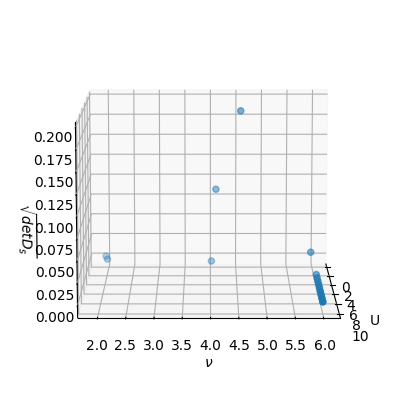

In [55]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

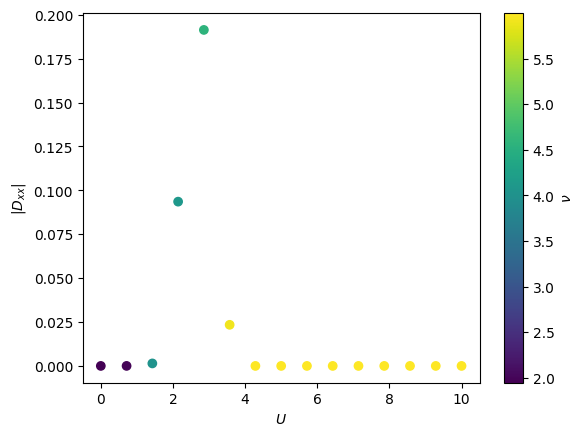

In [57]:
plt.xlabel(r'$U$')
plt.ylabel(r'$|D_{xx}|$')
#plt.ylim(0,0.4)
#plt.xlim(0,15)
plt.scatter(U[0:], np.abs(sfwxx[0:]), c=nu[0:])
plt.colorbar(label=r'$\nu$')

In [27]:
n=3
d = list(literal_eval(sfwtab.delta.iloc[n][1:-1]))
ns = list(literal_eval(sfwtab.ns.iloc[n][1:-1]))
Uv = sfwtab.U.iloc[n]
mus = sfwtab.mu.iloc[n]
nus = literal_eval(sfwtab.nu.iloc[n][1:-1])


In [28]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns, nu=nus, U=[Uv,Uv], mu=[mus, mus])

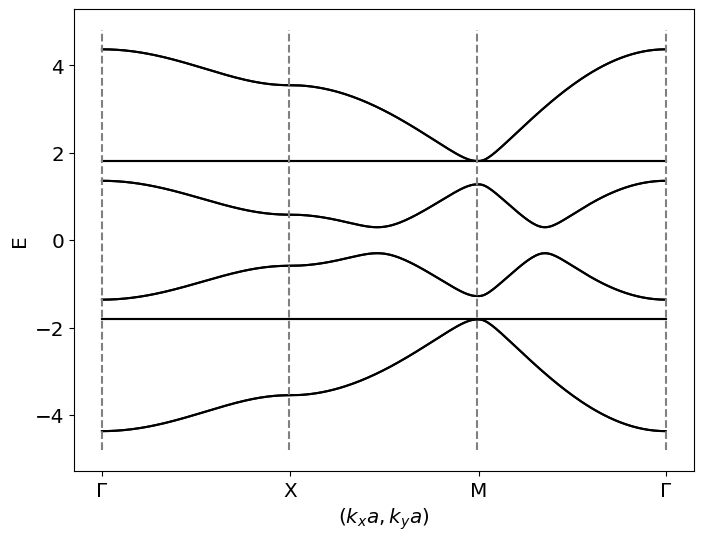

In [29]:
ham.plot_bands()

In [77]:
sfwxx[-1]/2

(-0.21438404460910782-2.945322543130314e-19j)

In [78]:
U = np.array(sfwtab2.U)
mu=np.array(sfwtab2.mu)
nu = np.array(sfwtab2.nu, dtype=complex)
deltas = np.array([*sfwtab2.delta], dtype=complex)
sdsfw = np.array(sfwtab2.sq_det_SFW, dtype=complex)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


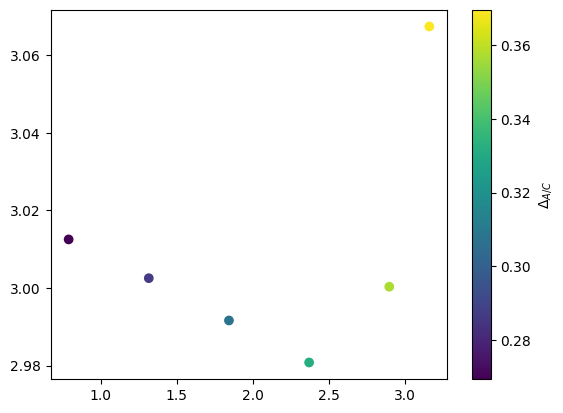

In [79]:
plt.scatter(U, nu,c=deltas[:,1])
plt.colorbar(label=r'$\Delta_{A/C}$')

In [80]:
def linfunc(x,m,n):
    return x*m+n

params, covp = fit(linfunc, U, mu)

In [81]:
covp

array([[ 6.04125887e-05, -1.24534715e-04],
       [-1.24534715e-04,  2.99134239e-04]])

In [82]:
Uarr = np.linspace(0,10,100)

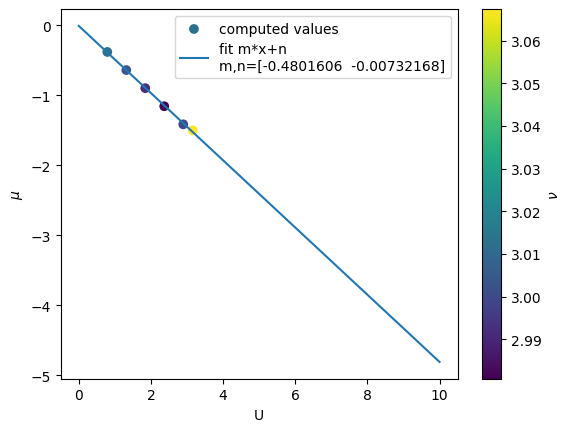

In [83]:
plt.xlabel('U')
plt.ylabel('$\mu$')


plt.scatter(U, mu,c=nu, label='computed values')
plt.plot(Uarr, linfunc(Uarr,*params), label=f'fit m*x+n\nm,n={params}')
plt.colorbar(label=r'$\nu$')
plt.legend()

In [84]:
sfwtab2.delta.iloc[:]

0    [(0.039231628800422746-1.4294820463225363e-20j...
1    [(0.07346148097379634+1.5995638795942288e-20j)...
2    [(0.11501086870790828-3.1556850834524705e-20j)...
3    [(0.16270137315548883-1.1123486447349069e-19j)...
4    [(0.21315378835497134-2.4663388890494768e-21j)...
5    [(0.23835008010253522+5.2642499423357043e-20j)...
Name: delta, dtype: object

In [85]:
np.array([*sfwtab2.delta])[:,1]

array([0.26928819+1.00843278e-18j, 0.28663527+1.26499677e-18j,
       0.30751637+3.33516198e-19j, 0.33143046+8.33129640e-19j,
       0.35684187-7.45607011e-19j, 0.36968755-5.67527824e-19j])

In [86]:
sfwtab2.nu.loc[np.array([*sfwtab2.delta])[:,1]>0.2]

0     (3.0125129674257893+6.234609998058662e-20j)
1     (3.002526394176937+1.2448983313124826e-19j)
2    (2.9916271552326927+1.3540663784257466e-19j)
3     (2.980798389253744+1.0116051489969854e-19j)
4      (3.000322313403875+3.183236749859206e-20j)
5        (3.067392620107659+5.6547616617445e-20j)
Name: nu, dtype: object

In [87]:
xarr = np.array(sfwtab2.U.loc[np.array(sfwtab2.nu, dtype=complex)>2])
yarr = np.array(sfwtab2.nu.loc[np.array(sfwtab2.nu, dtype=complex)>2], dtype=complex)
carr = np.array(sfwtab2.mu.loc[np.array(sfwtab2.nu, dtype=complex)>2], dtype=complex)

In [88]:
sfwtab2.mu.iloc[1]

-0.6379310344827586

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


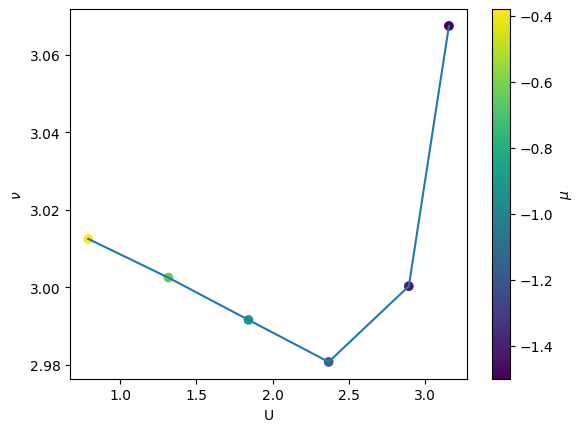

In [89]:
plt.xlabel('U')
plt.ylabel(r'$\nu$')
plt.scatter(U, nu, c=mu)
plt.plot(xarr, yarr)
plt.colorbar(label=r'$\mu$')

In [90]:
#U = np.array(sfwtab2.U.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2])
#nu = np.array(sfwtab2.nu.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2], dtype=complex)
#sdsfw = np.array(sfwtab2.sq_det_SFW.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2], dtype=complex)
#U = np.array(sfwtab2.U.loc[sfwtab2.U >= 1])
#nu = np.array(sfwtab2.nu.loc[sfwtab2.U >= 1], dtype=complex)
#sdsfw = np.array(sfwtab2.sq_det_SFW.loc[sfwtab2.U >= 1], dtype=complex)

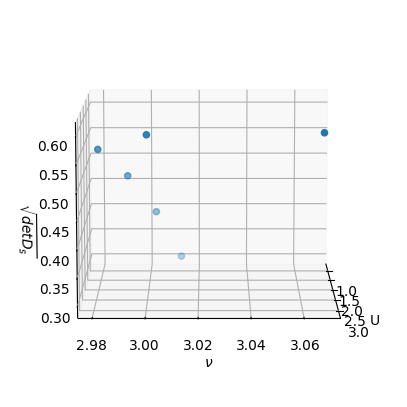

In [91]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

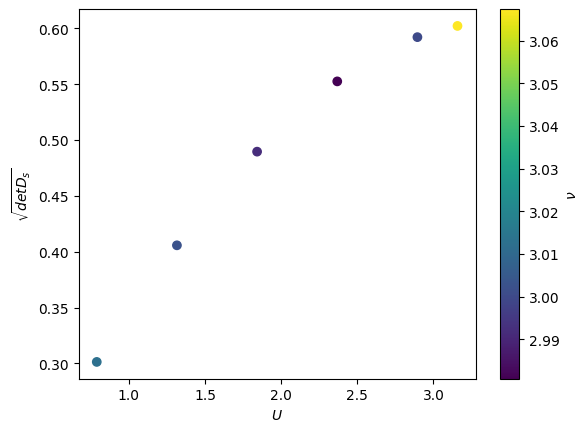

In [92]:
plt.xlabel(r'$U$')
plt.ylabel(r'$\sqrt{det D_s}$')
plt.scatter(U, sdsfw, c=nu)
plt.colorbar(label=r'$\nu$')

In [93]:
xarr = np.array(sfwtab2.mu.loc[sfwtab2.U==0.5])
yarr = np.array(sfwtab2.nu.loc[sfwtab2.U==0.5], dtype=complex)

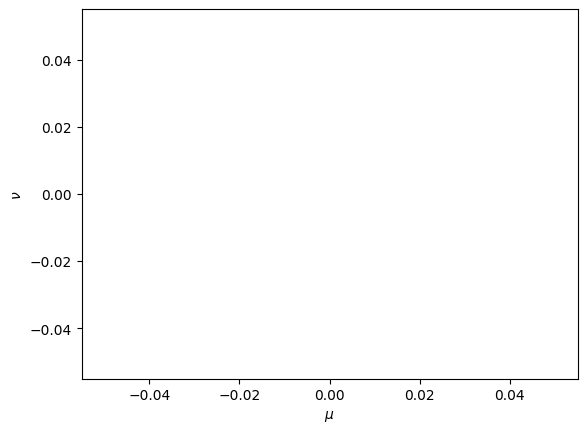

In [94]:
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\nu$')
plt.scatter(xarr, yarr)

In [95]:
sfwtab_nu3

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new
0,0.789474,-0.379310,(3.0125129674257893+6.234609998058662e-20j),(0.30132791061889413+8.496811714537978e-19j),[-0.31792947-8.54352371e-19j 0.10139348+1.594...,[ 0.10139348+1.59425798e-19j -0.31792947-8.579...,[(0.039231628800422746-1.4294820463225363e-20j...,"[(1.0071755337127803-1.1503340639881321e-21j),...",0.000131,0.010043,"[(-0.31792947-8.54352371e-19j), (0.10139348+1...."
1,1.315789,-0.637931,(3.002526394176937+1.2448983313124826e-19j),(0.40572315183623986+1.2167101303361298e-19j),[-0.42400223-2.09399052e-18j 0.12315281+4.646...,[ 0.12315281+4.64604229e-19j -0.42400223+1.591...,[(0.07346148097379634+1.5995638795942288e-20j)...,"[(1.0124688095971675-4.874791067294561e-21j), ...",0.000140,0.007867,"[(-0.42400223-2.09399052e-18j), (0.12315281+4...."
2,1.842105,-0.896552,(2.9916271552326927+1.3540663784257466e-19j),(0.48956645476016836+9.314418080599053e-19j),[-0.50586695-9.79663434e-19j 0.12738154+2.439...,[ 0.12738154+2.43939149e-19j -0.50586695-9.460...,[(0.11501086870790828-3.1556850834524705e-20j)...,"[(1.0214177295090296+1.1110812088917562e-20j),...",0.000164,0.006778,"[(-0.50586695-9.79663434e-19j), (0.12738154+2...."
3,2.368421,-1.155172,(2.980798389253744+1.0116051489969854e-19j),(0.5524702242960879+1.6423717029128016e-18j),[-0.56512313-2.46930914e-18j 0.11891512+5.978...,[ 0.11891512+5.9780321e-19j -0.56512313-9.9347...,[(0.16270137315548883-1.1123486447349069e-19j)...,"[(1.0350266192042512-1.685064724170448e-20j), ...",0.000190,0.005987,"[(-0.56512313-2.46930914e-18j), (0.11891512+5...."
4,2.894737,-1.413793,(3.000322313403875+3.183236749859206e-20j),(0.592078737784757+2.3432438167120857e-18j),[-0.60091627-1.59552211e-18j 0.10267977+4.142...,[ 0.10267977+4.14299330e-19j -0.60091627-3.163...,[(0.21315378835497134-2.4663388890494768e-21j)...,"[(1.0416171879996174-1.5001602993102552e-22j),...",0.000153,0.005364,"[(-0.60091627-1.59552211e-18j), (0.10267977+4...."
5,3.157895,-1.500000,(3.067392620107659+5.6547616617445e-20j),(0.6021168516153828+3.4181087730172883e-18j),[-0.60900182-2.46872540e-18j 0.09131549+6.135...,[ 0.09131549+6.13580789e-19j -0.60900182-4.474...,[(0.23835008010253522+5.2642499423357043e-20j)...,"[(1.0597695654688448+1.1890854959015373e-20j),...",0.000165,0.010134,"[(-0.60900182-2.4687254e-18j), (0.09131549+6.1..."
6,3.500000,-1.687884,(3.011093059235288-1.3273663844390345e-19j),(0.6044952102647275+3.929227502093128e-18j),[-0.60980572-3.61749577e-18j 0.08030292+3.929...,[ 0.08030292+3.92906274e-19j -0.60980572-4.276...,"[(0.266324660189894+1.2475794408244965e-19j), ...","[(1.0781590553505125-1.9504850495616525e-20j),...",0.000155,0.006960,"[(-0.60980572-3.61749577e-18j), (0.08030292+3...."
7,4.000000,-1.927964,(3.027275908945162-1.056275850134212e-19j),(0.5965898844346423+4.4112488965183235e-18j),[-0.60000563-4.66190313e-18j 0.06393173+7.697...,[ 0.06393173+7.69703519e-19j -0.60000563-4.274...,"[(0.30395148270120115-2.836854218094826e-19j),...","[(1.0920202441971705-2.717921412787676e-20j), ...",0.000172,0.006342,"[(-0.60000563-4.66190313e-18j), (0.06393173+7...."
8,4.500000,-2.218044,(2.9277761895297885+1.2281393083721393e-19j),(0.5723521152308779+3.6632652960814816e-18j),[-0.57461494-3.38212331e-18j 0.05094493-1.088...,[ 0.05094493-1.08898603e-19j -0.57461494-3.896...,"[(0.3335997047777735+2.874460536841101e-20j), ...","[(1.1140047341726862+5.675936729167965e-20j), ...",0.000176,0.002598,"[(-0.57461494-3.38212331e-18j), (0.05094493-1...."
9,4.500000,-2.168044,(3.052840280713009-3.812379329849967e-21j),(0.578245700748034+3.790936708254203e-18j),[-0.58043547-4.63751707e-18j 0.0503711 -1.262...,[ 0.0503711 -1.26221445e-19j -0.58043547-2.893...,"[(0.3350447285992281-2.7878444086737473e-19j),...","[(1.1023013489347608-2.4279896398953918e-20j),...",0.000168,0.005861,"[(-0.58043547-4.63751707e-18j), (0.0503711+0j)]"


In [96]:
U = np.array(sfwtab_nu3.U)
mu=np.array(sfwtab_nu3.mu)
nu = np.array(sfwtab_nu3.nu, dtype=complex)
sdsfw = np.array(sfwtab_nu3.sq_det_SFW, dtype=complex)
sfwxx = np.array(list(sfwtab_nu3.SFWxx_new))[:,0]
sfwxy = np.array(list(sfwtab_nu3.SFWxx_new))[:,1]

In [97]:
sfwxx

array([-0.31792947-8.54352371e-19j, -0.42400223-2.09399052e-18j,
       -0.50586695-9.79663434e-19j, -0.56512313-2.46930914e-18j,
       -0.60091627-1.59552211e-18j, -0.60900182-2.46872540e-18j,
       -0.60980572-3.61749577e-18j, -0.60000563-4.66190313e-18j,
       -0.57461494-3.38212331e-18j, -0.58043547-4.63751707e-18j,
       -0.55179428-4.58423539e-18j, -0.55549531-4.46324885e-18j,
       -0.52650704-4.03952088e-18j, -0.52834913-4.16294594e-18j,
       -0.50031328-2.67898476e-18j, -0.50129475-3.46935792e-18j,
       -0.47493681-4.00686859e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.45024449-3.23108815e-18j,
       -0.38735759-2.81274048e-18j, -0.38720481-3.55806514e-18j,
       -0.33787995-2.58428123e-18j])

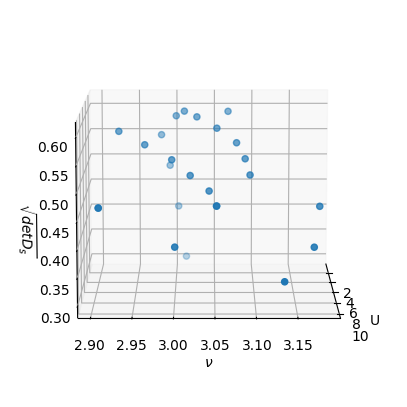

In [98]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


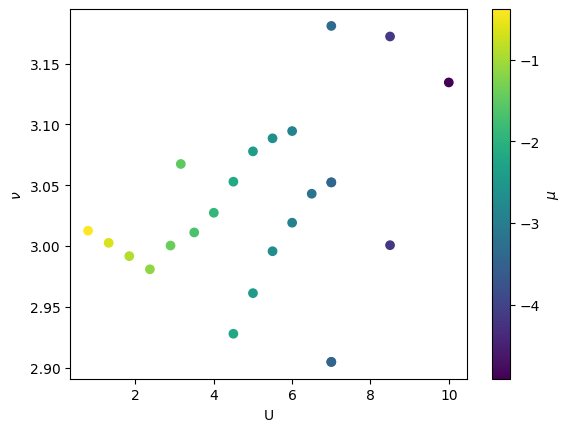

In [99]:
plt.xlabel('U')
plt.ylabel(r'$\nu$')
plt.scatter(U, nu, c=mu)
plt.plot(xarr, yarr)
plt.colorbar(label=r'$\mu$')

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_axes.py:4347: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


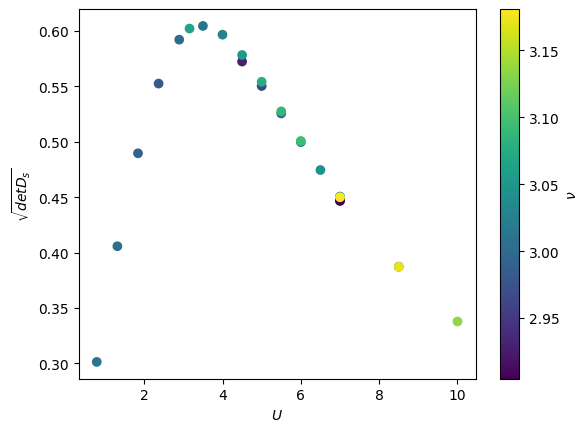

In [100]:
plt.xlabel(r'$U$')
plt.ylabel(r'$\sqrt{det D_s}$')
plt.scatter(U, sdsfw, c=nu)
plt.colorbar(label=r'$\nu$')

In [101]:
sfwxx

array([-0.31792947-8.54352371e-19j, -0.42400223-2.09399052e-18j,
       -0.50586695-9.79663434e-19j, -0.56512313-2.46930914e-18j,
       -0.60091627-1.59552211e-18j, -0.60900182-2.46872540e-18j,
       -0.60980572-3.61749577e-18j, -0.60000563-4.66190313e-18j,
       -0.57461494-3.38212331e-18j, -0.58043547-4.63751707e-18j,
       -0.55179428-4.58423539e-18j, -0.55549531-4.46324885e-18j,
       -0.52650704-4.03952088e-18j, -0.52834913-4.16294594e-18j,
       -0.50031328-2.67898476e-18j, -0.50129475-3.46935792e-18j,
       -0.47493681-4.00686859e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.45024449-3.23108815e-18j,
       -0.38735759-2.81274048e-18j, -0.38720481-3.55806514e-18j,
       -0.33787995-2.58428123e-18j])

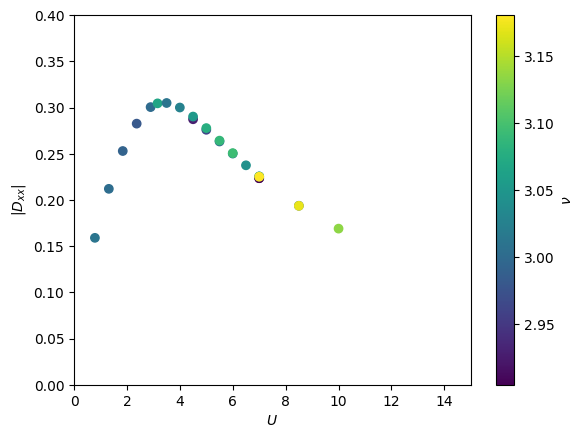

In [102]:
plt.xlabel(r'$U$')
plt.ylabel(r'$|D_{xx}|$')
plt.xlim(0,15)
plt.ylim(0,0.4)
plt.scatter(U, np.sqrt(sfwxx**2)/2, c=nu)
#plt.scatter(U, np.sqrt(sfwxy**2), c=nu)

plt.colorbar(label=r'$\nu$')